In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.relativedelta import relativedelta

In [9]:
DATA_PATH = 'data/Dataset/BeerAdvocate/ratings.csv'

ratings_df = pd.read_csv(DATA_PATH)

rating_per_beer = ratings_df.groupby('beer_id').agg(BeerName=('beer_name', 'min'), Count=('review', 'size'), Mean=('rating', 'mean')).sort_values(by='Mean')

In [49]:
ratings_df.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review'],
      dtype='object')

In [50]:
rating_per_date = ratings_df[['beer_id', 'beer_name', 'date', 'rating']].sort_values(by=['beer_id', 'date'])
rating_per_date = rating_per_date.dropna()
rating_per_date

,beer_id,beer_name,date,rating
8323005,3,Cactus Queen IPA,1019037600,4.02
8323004,3,Cactus Queen IPA,1037790000,3.88
8323003,3,Cactus Queen IPA,1047898800,4.42
8323023,4,Wildcatter's Crude Stout,1018000800,3.58
8323022,4,Wildcatter's Crude Stout,1037790000,3.68
...,...,...,...,...
2214341,293285,Common,1500890400,3.80
3402083,293286,Zero Dark Thirsty,1500890400,3.71
6477371,293294,Hazy Sunset,1500890400,3.99
5506051,293295,Imperial Red Ale,1500890400,3.40


In [61]:
beer_counts = rating_per_date.groupby('beer_id').size()
id_to_keep = beer_counts[beer_counts > 1000].index
id_to_keep

Index([     5,      6,      7,     10,     17,     30,     31,     33,     34,
           36,
       ...
       179482, 181572, 182256, 187317, 189272, 190513, 197183, 199848, 202078,
       211516],
      dtype='int64', name='beer_id', length=1404)

In [62]:
rating_per_date = rating_per_date[rating_per_date['beer_id'].isin(id_to_keep)]
rating_per_date['review_count'] = rating_per_date.groupby('beer_id')['beer_id'].transform('count')
rating_per_date

/var/folders/9z/qtyp_jyn7rnbcj96bcx367hh0000gn/T/ipykernel_30186/1873467221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_per_date['review_count'] = rating_per_date.groupby('beer_id')['beer_id'].transform('count')


,beer_id,beer_name,date,rating,review_count
1326290,5,Amber,994586400,4.00,1680
1326289,5,Amber,1017741600,3.38,1680
1326288,5,Amber,1018432800,3.98,1680
1326287,5,Amber,1020938400,3.65,1680
1326286,5,Amber,1022580000,3.30,1680
...,...,...,...,...,...
3105635,211516,Doppelganger,1500976800,4.64,1162
3105632,211516,Doppelganger,1501063200,4.48,1162
3105633,211516,Doppelganger,1501063200,4.39,1162
3105630,211516,Doppelganger,1501149600,4.64,1162


In [115]:
first_rate = rating_per_date.groupby('beer_id').head(3)
first_rate

,beer_id,beer_name,date,rating,review_count
1326290,5,Amber,994586400,4.00,1680
1326289,5,Amber,1017741600,3.38,1680
1326288,5,Amber,1018432800,3.98,1680
1344913,6,Turbodog,983530800,4.06,2894
1344912,6,Turbodog,988192800,3.06,2894
...,...,...,...,...,...
2489915,202078,Stone Enjoy By Unfiltered IPA,1452596400,4.28,1441
2489911,202078,Stone Enjoy By Unfiltered IPA,1452682800,4.73,1441
3105841,211516,Doppelganger,1453460400,4.73,1162
3105833,211516,Doppelganger,1453546800,4.50,1162


In [116]:
rating_first_vs_overall = rating_per_date.groupby('beer_id').agg( beer_name = ('beer_name', 'min'), review_count = ('review_count', 'min'), overall_mean = ('rating', 'mean'))
rating_first_vs_overall

,beer_name,review_count,overall_mean
beer_id,,,
5,Amber,1680,3.453768
6,Turbodog,2894,3.661320
7,Purple Haze,3293,3.277643
10,Allagash Dubbel Ale,1707,3.806157
17,Widmer Hefeweizen,2117,3.318611
...,...,...,...
190513,Project PAM,1039,4.199577
197183,Citradelic Tangerine IPA,1671,3.840592
199848,Stone Pataskala Red X IPA,1056,4.070540


In [117]:
rating_first_vs_overall['first_rates_mean'] = first_rate.groupby('beer_id')['rating'].mean()
rating_first_vs_overall

,beer_name,review_count,overall_mean,first_rates_mean
beer_id,,,,
5,Amber,1680,3.453768,3.786667
6,Turbodog,2894,3.661320,3.740000
7,Purple Haze,3293,3.277643,3.490000
10,Allagash Dubbel Ale,1707,3.806157,4.116667
17,Widmer Hefeweizen,2117,3.318611,3.996667
...,...,...,...,...
190513,Project PAM,1039,4.199577,4.170000
197183,Citradelic Tangerine IPA,1671,3.840592,4.166667
199848,Stone Pataskala Red X IPA,1056,4.070540,3.603333


In [118]:
corr = rating_first_vs_overall['first_rates_mean'].corr(rating_first_vs_overall['overall_mean'])
print("Correlation:", corr)

Correlation: 0.7987677626121974


In [119]:
plot_sub_sample = rating_first_vs_overall.sample(5)
plot_sub_sample

,beer_name,review_count,overall_mean,first_rates_mean
beer_id,,,,
127727,Alt Route: Altbier (Beer Camp Across America),1198,3.553314,3.573333
1882,Rodenbach Classic (Red),1818,3.994560,4.400000
148,Brooklyn Lager,3643,3.723494,3.436667
1376,Genesee Cream Ale,1363,3.034255,3.116667
1402,La Trappe Quadrupel (Koningshoeven / Dominus),2333,4.171487,3.713333


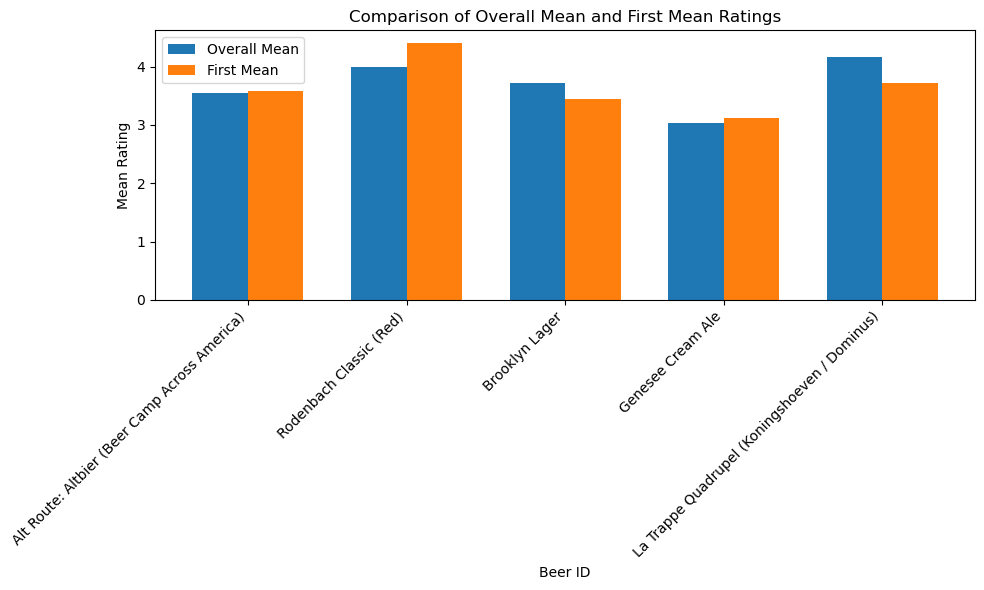

In [120]:
labels = plot_sub_sample['beer_name']
overall_means = plot_sub_sample['overall_mean']
first_means = plot_sub_sample['first_rates_mean']


# Largeur des barres
width = 0.35
x = np.arange(len(labels))

# Création du bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, overall_means, width, label='Overall Mean')
ax.bar(x + width/2, first_means, width, label='First Mean')

# Personnalisation des labels et de la légende
ax.set_xlabel('Beer ID')
ax.set_ylabel('Mean Rating')
ax.set_title('Comparison of Overall Mean and First Mean Ratings')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()